In [ ]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from shapely import geometry
from gasmarketmodel.params import europe_frame
import numpy as np
from PIL import Image

In [2]:
country_names = {
    "Deutschland" : "Germany",
    "Niederlande" : "Netherlands",
    "Frankreich" : "France",
    "Schweiz" : "Switzerland",
    "Luxemburg" : "Luxembourg",
    "Belgien" : "Belgium",
    "Spanien" : "Spain",
    "Portugal" : "Portugal",
    "Italien" : "Italy",
    "Österreich" : "Austria",
    "Schweden" : "Sweden",
    "Finnland" : "Finland",
    "Dänemark" : "Denmark",
    "Polen" : "Poland",
    "Tschechien" : "Czechia",
    "Slowakei" : "Slovakia",
    "Litauen" : "Lithuania",
    "Lettland" : "Latvia",
    "Estland" : "Estonia",
    "Ungarn" : "Hungary",
    "Slowenien" : "Slovenia",
    "Kroatien" : "Croatia",
    "Rumänien" : "Romania",
    "Bulgarien" : "Bulgaria",
    "Griechenland" : "Greece",
    "Irland" : "Ireland",
    "UK" : "United Kingdom",
    "Malta" : "Malta",
    "Zypern" : "Cyprus",
    "Ukraine" : "Ukraine"
}

importers_list = [
    "Algeria",
    "Libya",
    "Norway",
    "Russia"
]

In [3]:
mapping_dict = {
    "Luxemburg": "Belux",
    "Belgien" : "Belux",
    "Niederlande": "Niederlande",
    "Frankreich": "Frankreich",
    "Spanien" : "Iberia",
    "Portugal": "Iberia",
    "Italien": "Italien",
    "Schweiz": "Schweiz",
    "Österreich": "Österreich",
    "Deutschland": "Deutschland",
    "Schweden": "Skandinavien",
    "Finnland": "Skandinavien",
    "Dänemark": "Dänemark",
    "Polen": "Polen",
    "Tschechien": "Tschechien",
    "Slowakei": "Slowakei",
    "Lettland": "Baltikum",
    "Litauen": "Baltikum",
    "Estland": "Baltikum",
    "Griechenland": "SEE",
    "Ungarn": "SEE",
    "Slowenien": "SEE",
    "Kroatien": "SEE",
    "Rumänien": "SEE",
    "Bulgarien": "SEE",
    "UK": "Ukeire",
    "Irland" : "Ukeire",
    "Malta": "Malta",
    "Zypern": "Zypern",
    "Ukraine": "Ukraine"
}

/home/flo/.pyenv/versions/3.8.6/envs/gasmarketmodel/lib/python3.8/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.overlay(


'\n\ndata = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")\ndata = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))\nimg = Image.fromarray(data[180:-230, 297:-301, :])\nimg = img.convert("RGBA")\nnewData = []\nfor item in img.getdata():\n    if item[0] == 255 and item[1] == 255 and item[2] == 255:\n        newData.append((255, 255, 255, 0))\n    else:\n        newData.append(item)\nimg.putdata(newData)\nimg.save("map_subs_colors_nolabels.png", "PNG")\n\n#fig.savefig("map_subs_colors_nolabels.png", transparent = True)\n'

0.0 0.0 29.75 15.0 15.0
0.0 0.0 29.75 15.0 15.0


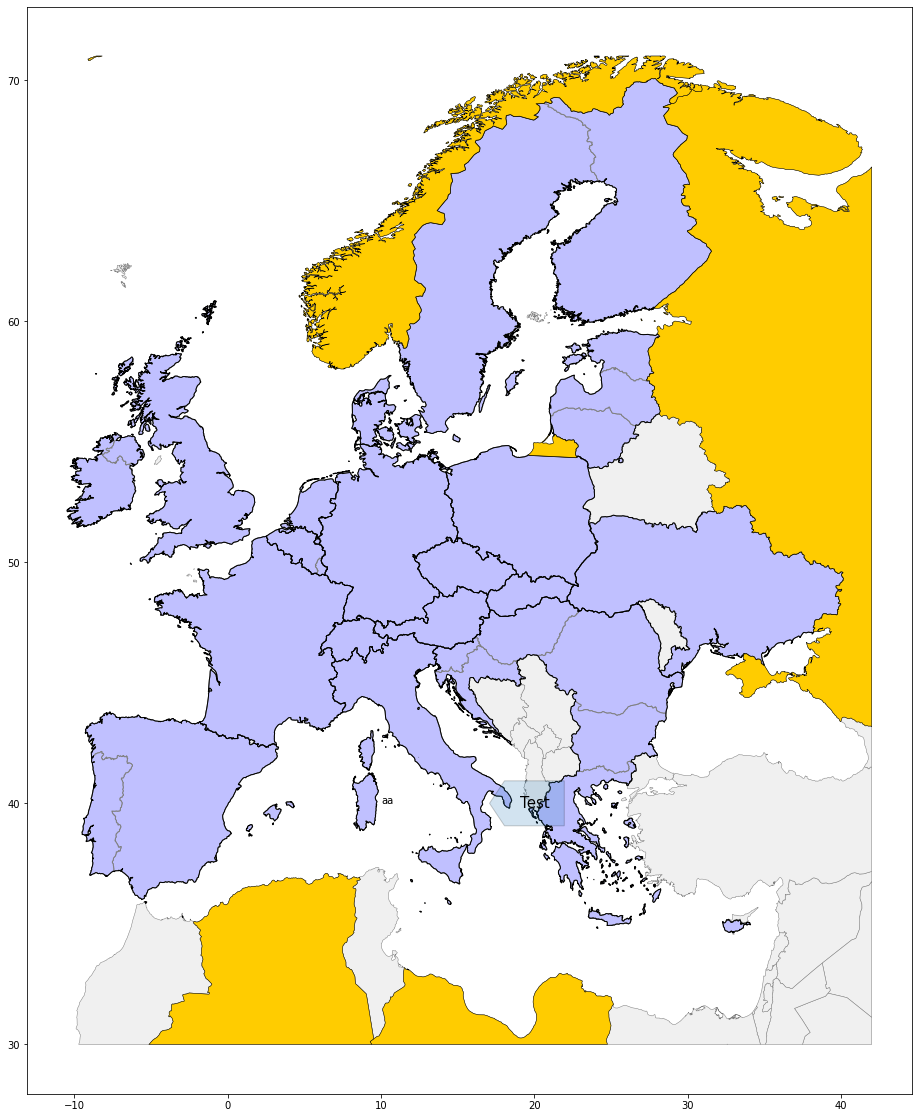

In [23]:
# Read in world data
world_gdf = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]]

# Restrict to countries within defined Europe rectangle
europe_gdf = world_gdf.overlay(europe_frame, how = "intersection")

# Create plot
fig, ax = plt.subplots(figsize = (20,20))

# Plot all countries in Europe rectangle
europe_gdf.plot(
    edgecolor = "grey",
    facecolor = (240/255, 240/255, 240/255),
    linewidth = 0.5,
    ax = ax
)

# Only countries relevant for study
country_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "grey",
    facecolor = (192/255, 192/255, 1),
    linewidth = 1,
    ax = ax
)

# Only regions relevant for study
regions_gdf = country_gdf.merge(
    pd.DataFrame.from_dict(
        mapping_dict,
        orient = "index",
        columns = ["region"]
    ).reset_index(),
    left_index = True,
    right_on = "index",
)[["geometry", "region"]].set_index("region").dissolve(by = "region")

# Plot them
regions_gdf.plot(
    edgecolor = "black",
    facecolor = "none",
    linewidth = 1,
    ax = ax
)

# Importers
importers_gdf = europe_gdf.merge(
    pd.DataFrame(importers_list, columns = ["Country"]),
    left_on = "ADMIN",
    right_on = "Country",
)[["Country", "geometry"]].set_index("Country")
# Plot them
importers_gdf.plot(
    edgecolor = "black",
    facecolor = (255/255, 204/255, 0/255),
    linewidth = 0.5,
    ax = ax
)

ax.annotate(xy = (10,40), text = "aa")

ax.text(20, 40, "Test", size=15, va="center", ha="center", rotation=0,
        bbox=dict(boxstyle=custom_box_style, alpha=0.2))


'''

data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
img = Image.fromarray(data[180:-230, 297:-301, :])
img = img.convert("RGBA")
newData = []
for item in img.getdata():
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("map_subs_colors_nolabels.png", "PNG")

#fig.savefig("map_subs_colors_nolabels.png", transparent = True)
'''

In [21]:
def custom_box_style(x0, y0, width, height, mutation_size):
    """
    Given the location and size of the box, return the path of the box around
    it.

    Rotation is automatically taken care of.

    Parameters
    ----------
    x0, y0, width, height : float
        Box location and size.
    mutation_size : float
        Mutation reference scale, typically the text font size.
    """
    print(x0, y0, width, height, mutation_size)
    # padding
    mypad = 1
    pad = mutation_size * mypad
    # width and height with padding added.
    width = width + 2 * pad
    height = height + 2 * pad
    # boundary of the padded box
    x0, y0 = x0 - pad, y0 - pad
    x1, y1 = x0 + width, y0 + height
    # return the new path
    return Path([(x0, y0),
                 (x1, y0), (x1, y1), (x0, y1),
                 (x0-pad, (y0+y1)/2), (x0, y0),
                 (x0, y0)],
                closed=True)